In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn.metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [ ]:
def validacao_cruzada(modelo, X, y,oversampling=False):
    kfold = KFold(n_splits=3)
    acuracias_split = []
    
    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino, :]
        if oversampling:
            sm = SMOTE(random_state=42)
            X_split_treino, y_split_treino = sm.fit_resample(X_split_treino, y_split_treino)
            test = y_split_treino

        modelo.fit(X_split_treino, y_split_treino.values.flatten())
        X_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao, :]
        predicoes_validacao = modelo.predict(X_split_validacao)
        acuracia_split = accuracy_score(y_split_validacao, predicoes_validacao)
        f1_split = f1_score(y_split_validacao, predicoes_validacao)
        acuracias_split.append(acuracia_split)
        print(f'Acurácia do split {idx}: {acuracia_split}')
        print(f'f1_score do split {idx}: {f1_split}')
    return acuracias_split, f1_split

In [ ]:
neo = pd.read_csv("neo_v2.csv")
neo_ban = pd.read_csv("your_name.csv")

In [ ]:
neo.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
neo.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [ ]:
neo.hazardous.value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [ ]:
81996/len(neo)*100

90.26817561319301

In [ ]:
8840/len(neo)*100

9.731824386806993

In [ ]:
neo.orbiting_body.unique()

array(['Earth'], dtype=object)

In [ ]:
neo.sentry_object.unique()

array([False])

[Text(0.5, 1.0, 'hazardous')]

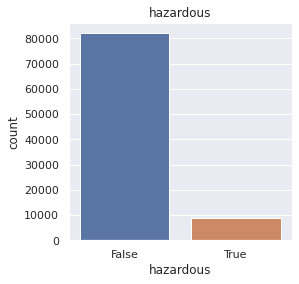

In [ ]:
sequential_colors = sns.color_palette("bright", 4)
plt.figure(figsize=(4, 4))
sns.countplot(data=neo,x='hazardous').set(title = 'hazardous')

In [ ]:
neo.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

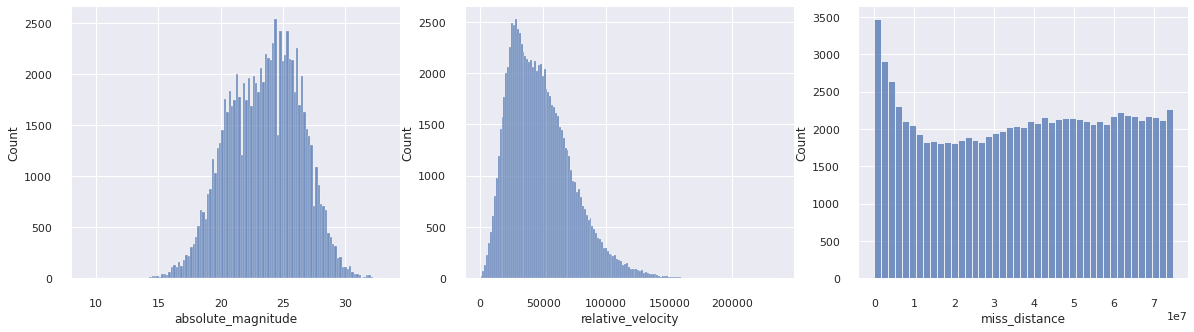

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data=neo, x='absolute_magnitude',ax=axes[0])
sns.histplot(data=neo, x='relative_velocity',ax=axes[1])
sns.histplot(data=neo, x='miss_distance',ax=axes[2])
sns.despine(offset=10, trim=True)

In [ ]:
neo_new = neo.copy(deep=True)
neo_new = neo_new.drop(['id', 'name','id'], axis=1)
fig = px.parallel_coordinates(neo_new.head(10),color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
fig.show()

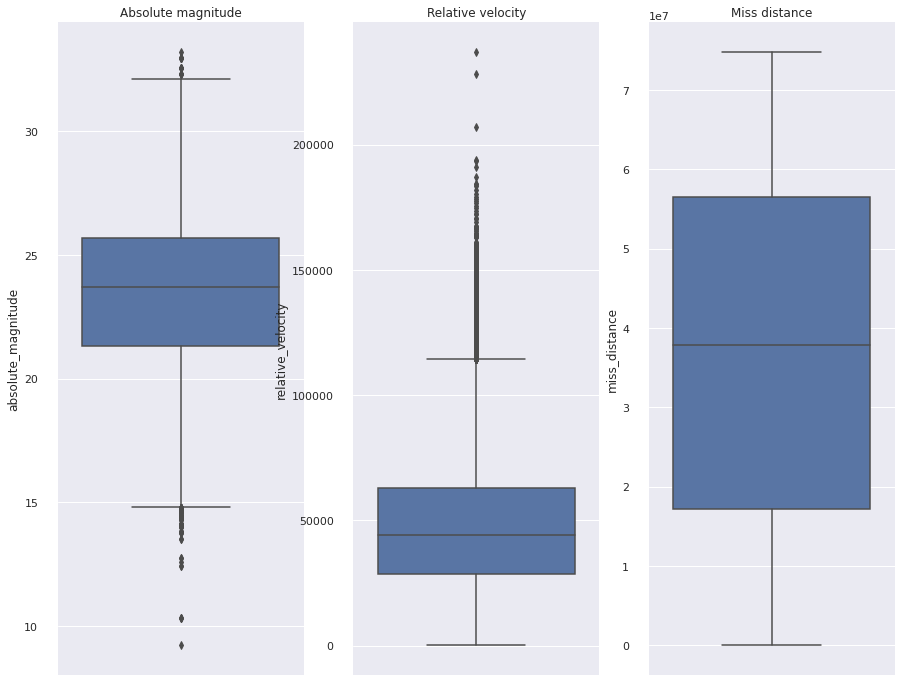

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 12))
sns.boxplot(data=neo, y ='absolute_magnitude',ax=axes[0]).set(title='Absolute magnitude')
sns.boxplot(data=neo, y ='relative_velocity',ax=axes[1]).set(title='Relative velocity')
sns.boxplot(data=neo, y ='miss_distance',ax=axes[2]).set(title='Miss distance')
sns.despine(offset=10, trim=True)

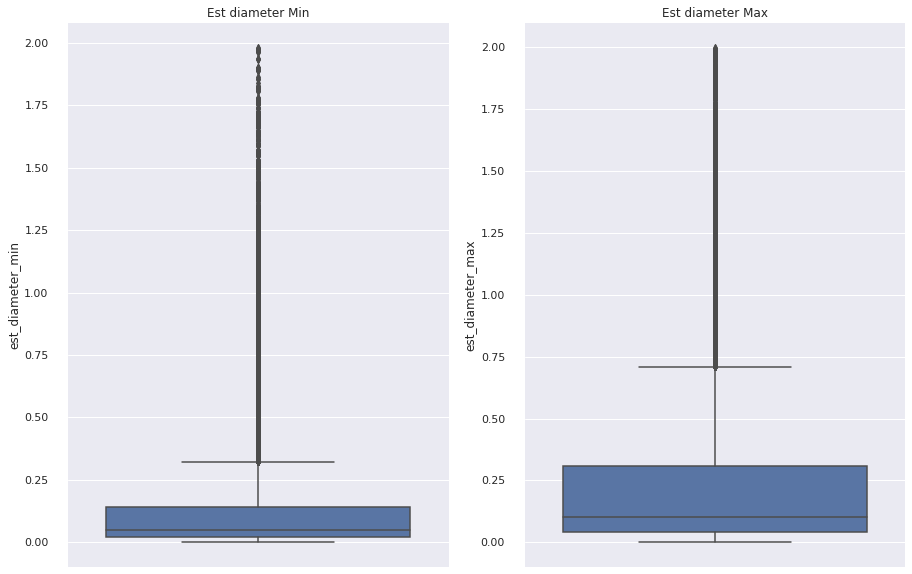

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(data=neo.query("est_diameter_min < 2"), y ='est_diameter_min',ax=axes[0]).set(title='Est diameter Min')
sns.boxplot(data=neo.query("est_diameter_max < 2"), y ='est_diameter_max',ax=axes[1]).set(title='Est diameter Max')
sns.despine(offset=10, trim=True)

In [ ]:
neo.est_diameter_max.max()

84.7305408852

In [ ]:
neo.query("est_diameter_max == 84.7305408852")

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.89265,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False


In [ ]:
neo.est_diameter_min.max()

37.8926498379

In [ ]:
neo.query("est_diameter_min == 37.8926498379")

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
36418,2001036,1036 Ganymed (A924 UB),37.89265,84.730541,51496.923293,5.372124e+07,Earth,False,9.23,False


In [ ]:
neo_new = neo.copy(deep=True)
neo_new = neo_new.drop(['id', 'name','orbiting_body','sentry_object','hazardous'], axis=1)

[Text(0.5, 1.0, 'relative_velocity')]

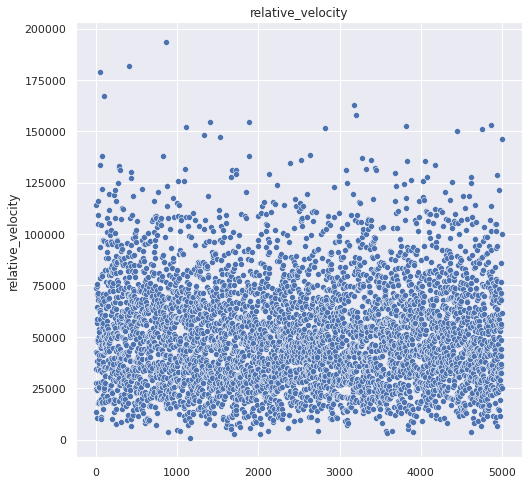

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=neo.relative_velocity.head(5000)).set(title = 'relative_velocity')

[Text(0.5, 1.0, 'absolute_magnitude')]

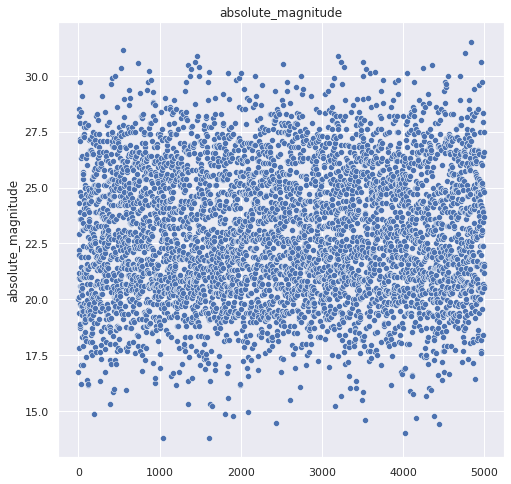

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=neo.absolute_magnitude.head(5000)).set(title = 'absolute_magnitude')

[Text(0.5, 1.0, 'miss_distance')]

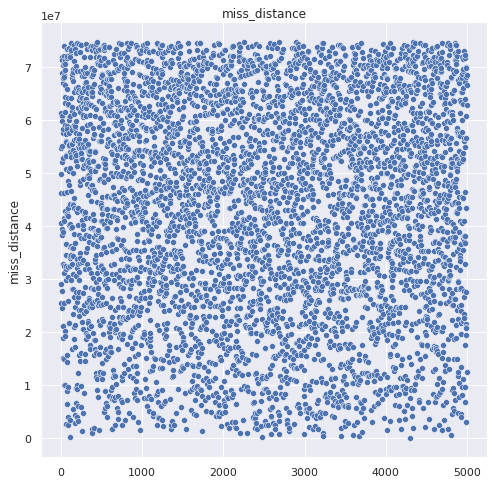

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=neo.miss_distance.head(5000)).set(title = 'miss_distance')

[Text(0.5, 1.0, 'est_diameter_min')]

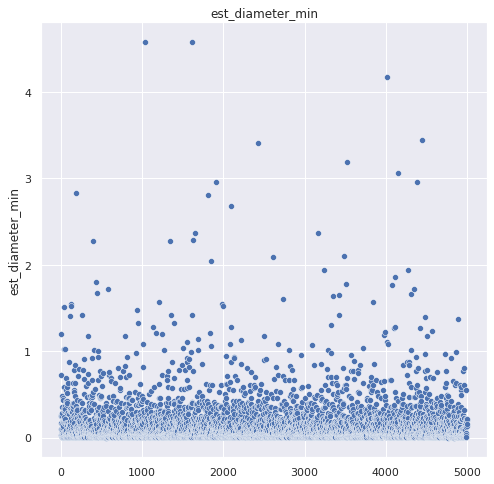

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=neo.est_diameter_min.head(5000)).set(title = 'est_diameter_min')

[Text(0.5, 1.0, 'est_diameter_max')]

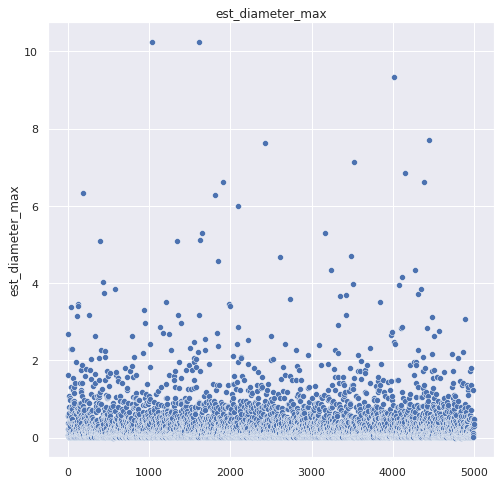

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=neo.est_diameter_max.head(5000)).set(title = 'est_diameter_max')

In [ ]:
neo["hazardous"] *= 1

In [ ]:
Y = neo.hazardous

In [ ]:
Y.to_frame()

,hazardous
0,0
1,1
2,0
3,0
4,1
...,...
90831,0
90832,0
90833,0
90834,0


In [ ]:
neo = pd.concat([neo,Y],axis='columns')

In [ ]:
del neo['hazardous']
del neo['sentry_object']
del neo['id']
del neo['orbiting_body']
del neo['name']

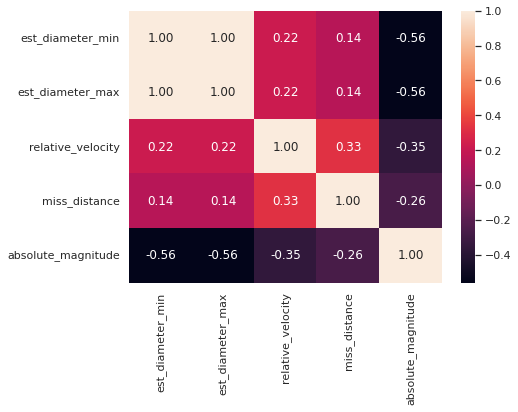

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(neo.corr(),
            annot = True,
            fmt = '.2f')
plt.show()

In [ ]:
def normalize(data):
    for column in data.columns: 
        data[column] = (data[column] - data[column].mean()) /data[column].std()     
    return data

In [ ]:
X = normalize(neo)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
y_train = pd.DataFrame(data=y_train)

In [ ]:
Y = neo_ban.hazardous

In [ ]:
X = neo_ban
del X["hazardous"]

In [ ]:
X_train_ban, X_test_ban, y_train_ban, y_test_ban = train_test_split(X,Y,test_size=0.2)

In [ ]:
y_train_ban = pd.DataFrame(data=y_train_ban)

In [ ]:
rfc = RandomForestClassifier ()
search_space = {
    "bootstrap":Categorical([True,False]),
    "max_depth": Integer(1,15),
    "max_features":Categorical(['auto','sqrt','log2']),
    "min_samples_leaf":Integer(1,15),
    "min_samples_split":Integer(2,15),
    "n_estimators":Integer(230,500)
}
#rfc_search = BayesSearchCV(rfc,search_space,n_iter=32,scoring="f1",n_jobs=-1,cv=5)
#rfc_search.fit(X_train,y_train)

In [ ]:
#rfc_search.best_params_

In [ ]:
rfc = RandomForestClassifier (bootstrap = True,max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=2, n_estimators=230)

In [ ]:
ACC,F1=validacao_cruzada(rfc, X_train_ban, y_train_ban,oversampling=False)
CROSS_LIST =[{"nome":"rfc","ACC": np.mean(ACC)*100,"F1": np.mean(F1)*100,"Oversampling":"False"}]

Acurácia do split 0: 0.8810180275715801
f1_score do split 0: 0.892053107562055
Acurácia do split 1: 0.8816542948038176
f1_score do split 1: 0.892733564013841
Acurácia do split 2: 0.8750530335171829
f1_score do split 2: 0.8863592513988038


In [ ]:
ACC,F1=validacao_cruzada(rfc, X_train, y_train,oversampling=True)
CROSS_LIST.append([{"nome":"rfc","ACC": np.mean(ACC)*100,"F1": np.mean(F1)*100,"Oversampling":"True"}])

Acurácia do split 0: 0.8082813854600999
f1_score do split 0: 0.4804206757663907
Acurácia do split 1: 0.8109647855344094
f1_score do split 1: 0.48394004282655245
Acurácia do split 2: 0.8013789117331351
f1_score do split 2: 0.4820755732586931


In [ ]:
CROSS_LIST

[{'nome': 'rfc',
  'ACC': 87.9241785297527,
  'F1': 88.63592513988038,
  'Oversampling': 'False'},
 [{'nome': 'rfc',
   'ACC': 80.68750275758815,
   'F1': 48.20755732586931,
   'Oversampling': 'True'}]]

In [ ]:
C_xgb = xgb.XGBClassifier()

In [ ]:

search_space = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
#C_xgb_sh = BayesSearchCV(C_xgb,search_space,n_iter=32,scoring="neg_mean_squared_error",n_jobs=-1,cv=5)
#C_xgb_sh.fit(X_train,y_train)

In [ ]:
#C_xgb_sh.best_params_

In [ ]:
C_xgb = xgb.XGBClassifier(max_depth=20,booster='gbtree',colsample_bylevel=0.7999999999999999,colsample_bytree=0.14,learning_rate=0.01,n_estimators=1000,subsample=0.7)

In [ ]:
ACC,F1=validacao_cruzada(C_xgb, X_train_ban, y_train_ban,oversampling=False)
CROSS_LIST.append([{"nome":"C_xgb","ACC": np.mean(ACC)*100,"F1": np.mean(F1)*100,"Oversampling":"False"}])

Acurácia do split 0: 0.8778366914103923
f1_score do split 0: 0.8871915393654524
Acurácia do split 1: 0.8697773064687169
f1_score do split 1: 0.8793238993710693
Acurácia do split 2: 0.8621128553245652
f1_score do split 2: 0.8718959400867166


In [ ]:
gnb = GaussianNB()
ACC,F1=validacao_cruzada(gnb, X_train_ban, y_train_ban,oversampling=False)
CROSS_LIST.append([{"nome":"gnb","ACC": np.mean(ACC)*100,"F1": np.mean(F1)*100,"Oversampling":"False"}])

Acurácia do split 0: 0.8171792152704136
f1_score do split 0: 0.8270465489566614
Acurácia do split 1: 0.8267232237539767
f1_score do split 1: 0.838505633524412
Acurácia do split 2: 0.8075943996605854
f1_score do split 2: 0.8170264272745612


In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(X_train_ban, y_train_ban, batch_size=32, epochs=20)

Epoch 1/20
442/442 [==============================] - 2s 2ms/step - loss: 87.8032 - accuracy: 0.5107
Epoch 2/20
442/442 [==============================] - 1s 3ms/step - loss: 20.2123 - accuracy: 0.5264
Epoch 3/20
442/442 [==============================] - 1s 3ms/step - loss: 22.4354 - accuracy: 0.5312
Epoch 4/20
442/442 [==============================] - 1s 3ms/step - loss: 17.6924 - accuracy: 0.5398
Epoch 5/20
442/442 [==============================] - 1s 2ms/step - loss: 17.1536 - accuracy: 0.5479
Epoch 6/20
442/442 [==============================] - 1s 2ms/step - loss: 13.7298 - accuracy: 0.5672
Epoch 7/20
442/442 [==============================] - 1s 2ms/step - loss: 14.5163 - accuracy: 0.5739
Epoch 8/20
442/442 [==============================] - 1s 2ms/step - loss: 19.3423 - accuracy: 0.5687
Epoch 9/20
442/442 [==============================] - 1s 2ms/step - loss: 11.2810 - accuracy: 0.5957
Epoch 10/20
442/442 [==============================] - 1s 2ms/step - loss: 7.5845 - accurac

In [ ]:
CROSS_LIST

[{'nome': 'rfc',
  'ACC': 87.9241785297527,
  'F1': 88.63592513988038,
  'Oversampling': 'False'},
 [{'nome': 'rfc',
   'ACC': 80.68750275758815,
   'F1': 48.20755732586931,
   'Oversampling': 'True'}],
 [{'nome': 'C_xgb',
   'ACC': 86.99089510678914,
   'F1': 87.18959400867166,
   'Oversampling': 'False'}],
 [{'nome': 'gnb',
   'ACC': 81.7165612894992,
   'F1': 81.70264272745612,
   'Oversampling': 'False'}]]

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)
np.concatenate([pred_array, test_array], axis=1)

568/568 [==============================] - 1s 2ms/step


array([[0, 0],
       [0, 0],
       [1, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [ ]:
matriz = confusion_matrix(y_test, y_pred) 
matriz

array([[11151,  5231],
       [   48,  1738]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7094341699691765

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     16382
           1       0.25      0.97      0.40      1786

    accuracy                           0.71     18168
   macro avg       0.62      0.83      0.60     18168
weighted avg       0.92      0.71      0.77     18168



In [ ]:
y_pred = rfc.predict(X_test)
matriz = confusion_matrix(y_test, y_pred) 
matriz

array([[12953,  3429],
       [   99,  1687]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8058124174372523

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     16382
           1       0.33      0.94      0.49      1786

    accuracy                           0.81     18168
   macro avg       0.66      0.87      0.68     18168
weighted avg       0.93      0.81      0.84     18168

